In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


<function matplotlib.pyplot.show(close=None, block=None)>

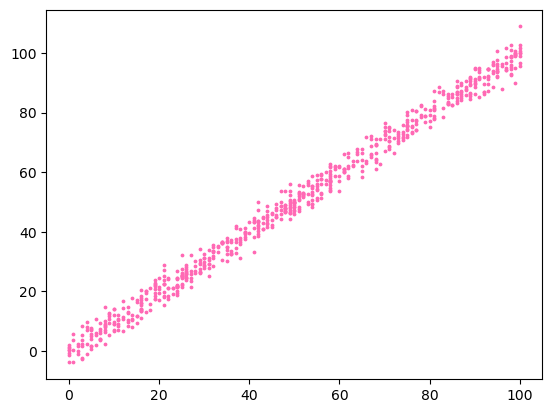

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['x'],df['y'], c = 'hotpink', s = 3)
plt.show

In [11]:
from sklearn.linear_model import LinearRegression

# Data Processing

In [13]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


### Removing Null values

In [14]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  700


,Total Missing,In Percent
y,1,0.14
x,0,0.00


In [15]:
df = df.dropna(subset=['y'])

In [16]:
df.shape

(699, 2)

# Applying Linear Regression

In [22]:
model = LinearRegression()
X_train = np.array(df.iloc[:, :-1].values)
Y_train = np.array(df.iloc[:, 1].values)
lr = model.fit(X_train, Y_train)
lr.score(X_train, Y_train),lr.coef_,lr.intercept_

(0.9907015319025518, array([1.00065638]), -0.10726546430097272)

### Loading Test Data

In [24]:
test = pd.read_csv('test.csv')
X_test = np.array(test.iloc[:, :-1].values)
Y_test = np.array(test.iloc[:, 1].values)
accuracy = lr.score(X_test,Y_test)
accuracy

0.9888014444327563

In [25]:
y_pred = lr.predict(X_test)

In [29]:
Y_test

array([ 79.77515201,  23.17727887,  25.60926156,  17.85738813,
        41.84986439,   9.80523488,  58.87465933,  97.61793701,
        18.39512747,   8.74674765,   2.81141583,  17.09537241,
        95.14907176,  61.38800663,  40.24701716,  14.82248589,
        66.95806869,  16.63507984,  90.65513736,  77.22982636,
        92.11906278,  46.91387709,  89.82634442,  21.71380347,
        97.41206981,  57.01631363,  78.31056542,  19.1315097 ,
        93.03483388,  26.59112396,  97.55155344,  31.43524822,
        35.12724777,  78.61042432,  33.07112825,  51.69967172,
        53.62235225,  69.46306072,  27.42497237,  36.34644189,
        95.06140858,  68.16724757,  50.96155532,  78.04237454,
         5.60766487,  36.11334779,  67.2352155 ,  65.01324035,
        38.14753871,  34.31141446,  95.28503937,  87.84749912,
        54.08170635,  31.93063515,  59.61247085,  -1.04011421,
        47.49374765,  62.60089773,  70.9146434 ,  56.14834113,
        14.05572877,  68.11367147,  75.59701346,  59.22

In [28]:
y_pred

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [26]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


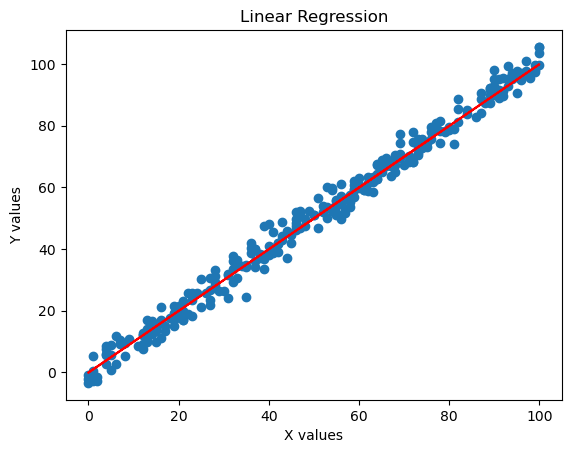

In [27]:
plt.scatter("x","y",data = test)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression")
plt.show()

## Errors

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(Y_test, y_pred),mean_squared_error(Y_test, y_pred)

(2.415771850041258, 9.432922192039305)

In [33]:
from math import sqrt
sqrt(mean_squared_error(Y_test, y_pred))

3.071306268029827